In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:

train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


# Data Preprocessing and EDA 

In [5]:
#changing it to date time train
train["issue_date"]=pd.to_datetime(train["issue_date"],format='%Y-%m-%d')
train["listing_date"]=pd.to_datetime(train["listing_date"],format='%Y-%m-%d')


#changing it to date time test
test["issue_date"]=pd.to_datetime(test["issue_date"],format='%Y-%m-%d')
test["listing_date"]=pd.to_datetime(test["listing_date"],format='%Y-%m-%d')

#date difference between  
train["days_stayed"]=train["listing_date"]-train["issue_date"]
test["days_stayed"]=test["listing_date"]-test["issue_date"]

In [6]:
#making the days features
# train["days_stayed"]=train["days_stayed"].str.replace("days","-")
# test["days_stayed"]=test["days_stayed"].str.replace("days","-")

#getting the days from the difference time
train["total_days_stayed"]=train["days_stayed"].dt.days
test["total_days_stayed"]=test["days_stayed"].dt.days

#getting the hours from the date
train["total_hours_stayed"]=round(((train["days_stayed"].dt.seconds)/60)/60,2)
test["total_hours_stayed"]=round(((test["days_stayed"].dt.seconds)/60)/60,2)

In [7]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days_stayed,total_days_stayed,total_hours_stayed
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00,73,16.42
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00,1862,17.78
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00,752,8.40
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00,755,18.50
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00,52,9.63


In [8]:
#checking the values if there is any null value and forming a new column.
train["condition_is_missing"]=train["condition"].isnull()
test["condition_is_missing"]=test["condition"].isnull()

In [9]:
train["condition_is_missing"]=np.where(train["condition_is_missing"]==True,1,0)
test["condition_is_missing"]=np.where(test["condition_is_missing"]==True,1,0)

In [10]:
#encoding for the categorical variable.
le=LabelEncoder()
le.fit(train["color_type"])

train["color_type"]=le.transform(train["color_type"])
test["color_type"]=le.transform(test["color_type"])

#filling missing values in the conditions
train["condition"].fillna(3,inplace=True)
test["condition"].fillna(3,inplace=True)

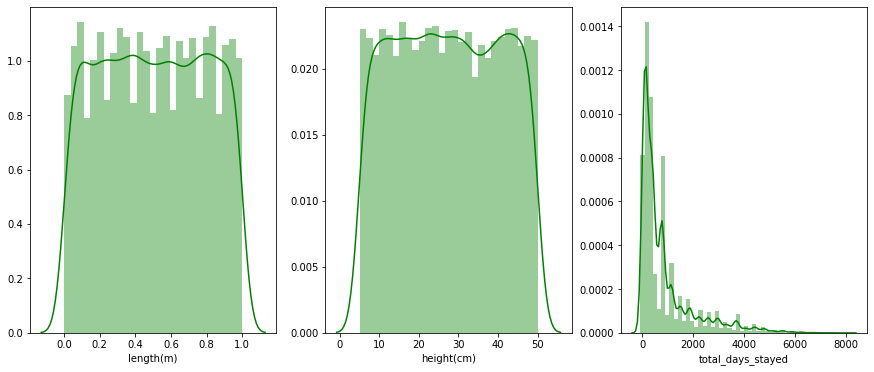

In [12]:
#checking for the distribution and skewness if any in the continuous variable.
cols = ["length(m)","height(cm)","total_days_stayed"]
fig, ax = plt.subplots(1,3,figsize=(15,6),squeeze=False)
for i in np.arange(3):
    sns.distplot(train[cols[i]], ax=ax[0][i], color="green")
plt.show()

In [13]:
#Since the days variable is right skewed, we can try transformation on it for improvising its skewness.
train["total_days_stayed"] = np.log1p(train["total_days_stayed"])
test["total_days_stayed"] = np.log1p(test["total_days_stayed"])

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   pet_id                18834 non-null  object         
 1   issue_date            18834 non-null  datetime64[ns] 
 2   listing_date          18834 non-null  datetime64[ns] 
 3   condition             18834 non-null  float64        
 4   color_type            18834 non-null  int32          
 5   length(m)             18834 non-null  float64        
 6   height(cm)            18834 non-null  float64        
 7   X1                    18834 non-null  int64          
 8   X2                    18834 non-null  int64          
 9   breed_category        18834 non-null  float64        
 10  pet_category          18834 non-null  int64          
 11  days_stayed           18834 non-null  timedelta64[ns]
 12  total_days_stayed     18832 non-null  float64        
 13  t

In [15]:
#we can see there are two null values in the total days column so i will fill it with the median value.

train["total_days_stayed"].fillna(0, inplace = True)

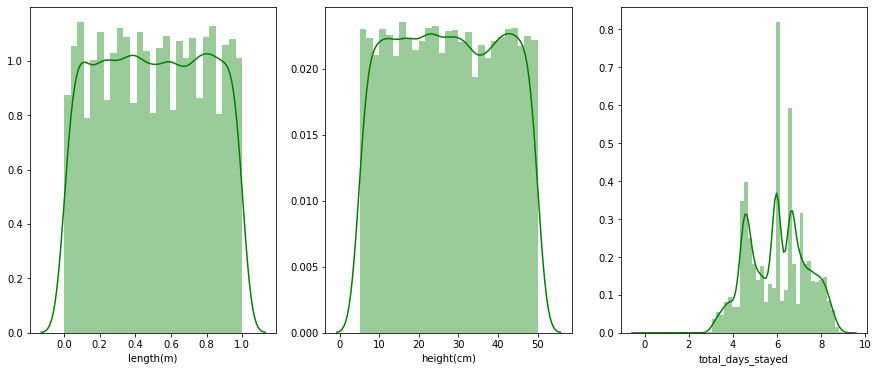

In [17]:
cols = ["length(m)","height(cm)","total_days_stayed"]
fig, ax = plt.subplots(1,3,figsize=(15,6),squeeze=False)
for i in np.arange(3):
    sns.distplot(train[cols[i]], ax=ax[0][i], color="green")
plt.show()

# Feature Selection and checking the correlation

In [40]:
train.corr()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,total_days_stayed,total_hours_stayed,condition_is_missing
condition,1.000000,-0.067944,-0.006069,-0.006080,0.457061,0.359141,0.103387,0.196044,-0.241931,-0.137808,0.609781
color_type,-0.067944,1.000000,0.003170,0.000405,-0.040391,0.012938,-0.014681,0.045452,0.069937,0.016258,-0.067844
length(m),-0.006069,0.003170,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999,-0.004409,-0.001713,0.004034
height(cm),-0.006080,0.000405,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976,0.001485,0.005612,0.003509
X1,0.457061,-0.040391,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594,-0.184061,-0.344305,0.345081
X2,0.359141,0.012938,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116,0.073762,-0.268929,0.106470
breed_category,0.103387,-0.014681,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230,-0.146111,-0.048920,0.648124
pet_category,0.196044,0.045452,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000,0.248830,-0.025482,0.360560
total_days_stayed,-0.241931,0.069937,-0.004409,0.001485,-0.184061,0.073762,-0.146111,0.248830,1.000000,-0.051935,-0.185719
total_hours_stayed,-0.137808,0.016258,-0.001713,0.005612,-0.344305,-0.268929,-0.048920,-0.025482,-0.051935,1.000000,-0.080784


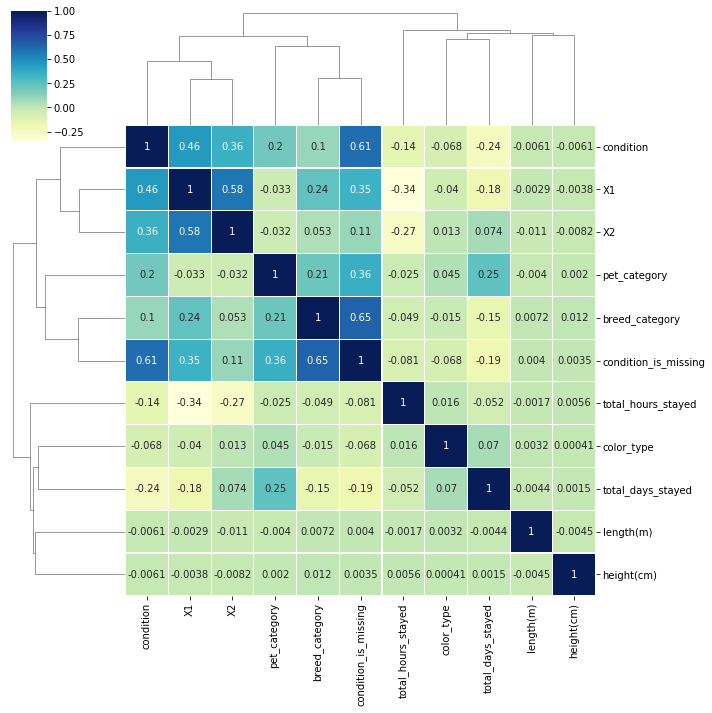

In [41]:
corrmat = train.corr()
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1,annot = True); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [42]:
train.corr()['pet_category'].sort_values(ascending=False)

pet_category            1.000000
condition_is_missing    0.360560
total_days_stayed       0.248830
breed_category          0.209230
condition               0.196044
color_type              0.045452
height(cm)              0.001976
length(m)              -0.003999
total_hours_stayed     -0.025482
X2                     -0.032116
X1                     -0.032594
Name: pet_category, dtype: float64

In [43]:
train.corr()['breed_category'].sort_values(ascending=False)

breed_category          1.000000
condition_is_missing    0.648124
X1                      0.240729
pet_category            0.209230
condition               0.103387
X2                      0.052530
height(cm)              0.011647
length(m)               0.007229
color_type             -0.014681
total_hours_stayed     -0.048920
total_days_stayed      -0.146111
Name: breed_category, dtype: float64

In [44]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days_stayed,total_days_stayed,total_hours_stayed,condition_is_missing
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,18,0.80,7.78,13,9,0.0,1,73 days 16:25:00,4.304065,16.42,0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,53,0.72,14.19,13,9,0.0,2,1862 days 17:47:00,7.529943,17.78,0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,3.0,15,0.15,40.90,15,4,2.0,4,752 days 08:24:00,6.624065,8.40,1
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,53,0.62,17.82,0,1,0.0,2,755 days 18:30:00,6.628041,18.50,0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,2,0.50,11.06,18,4,0.0,1,52 days 09:38:00,3.970292,9.63,0


In [45]:
#dividing the data into the target variables and the independent variables.

X=train.drop(['pet_id', 'issue_date', 'listing_date','breed_category', 'pet_category','days_stayed'],axis=1)
y=train["pet_category"]

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.0470589  0.22929896 0.08815503 0.09132475 0.11596553 0.06671109
 0.21219768 0.10147996 0.0478081 ]


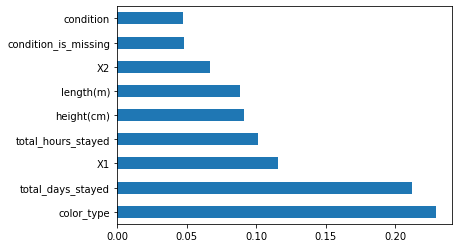

In [47]:
#this shows the importance of different dependent variables.

ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(9).plot(kind='barh')
plt.show()

# Preparing and training the model

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [51]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.01, n_estimators=600,
                    silent=True, nthread=10)

In [52]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_weighted', n_jobs=4, cv=5, verbose=3, random_state=1001 )


In [53]:
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.6min finished


{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}
XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5,
              min_child_weight=5, n_estimators=600, nthread=10,
              objective='multi:softprob', silent=True, subsample=0.8)


In [54]:
xgb=grid.best_estimator_

In [55]:
xgb.fit(X_train,y_train)

predictions = xgb.predict(X_test)


from sklearn.metrics import f1_score
print ('F1 score:', f1_score(y_test, predictions,average='weighted'))
                         

F1 score: 0.8996807927652782


In [56]:
x_test=test.drop(['pet_id', 'issue_date', 'listing_date','days_stayed'],axis=1)

In [57]:
predicted_rfc_pc=xgb.predict(x_test)

In [58]:
X=train.drop(['pet_id', 'issue_date', 'listing_date','breed_category', 'pet_category','days_stayed'],axis=1)
y=train["breed_category"]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

In [60]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.01, n_estimators=600,
                    silent=True, nthread=10)

In [61]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_weighted', n_jobs=4, cv=3, verbose=3, random_state=1001 )


In [62]:
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   48.2s finished


{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=5,
              n_estimators=600, nthread=10, objective='multi:softprob',
              silent=True, subsample=0.6)


In [63]:
xg=grid.best_estimator_

In [64]:
xg.fit(X_train,y_train)

predictions = xg.predict(X_test)


from sklearn.metrics import f1_score
print ('F1 score:', f1_score(y_test, predictions,average='weighted'))
                              

F1 score: 0.910356750654202


In [65]:
predicted_rfc_bc=xg.predict(x_test)

In [66]:
id=pd.Series(test["pet_id"])
submission=pd.DataFrame({'pet_id':id,'breed_category':predicted_rfc_bc,'pet_category':predicted_rfc_pc})
submission.to_csv("submission123.csv",index=False)